<a href="https://colab.research.google.com/github/Michaelzats/Assets-optimisation-predictor/blob/main/Assets_optimisation_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assets optimisation predictor

The following tool optmises the portfolio from the given assets by finding the best allocation of the assets by Max Sharpe Ratio and Min Volatility. Besides that, the tool will give you the exaxt number of the assets to buy.

The required packages

In [6]:
!pip install -q yfinance
!pip install pandas-datareader
!pip install pulp
!pip install --upgrade pandas
!pip install PyPortfolioOpt
!pip install --upgrade pandas-datareader



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0+untagged.811.gea66d6b
    Uninstalling pandas-datareader-0+untagged.811.gea66d6b:
      Successfully uninstalled pandas-datareader-0+untagged.811.gea66d6b


In [7]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from pandas_datareader import data
from pulp import *
import requests
from pandas_datareader import data as pdr
import yfinance as yfin
from pypfopt.expected_returns import mean_historical_return
from pypfopt import expected_returns
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.cla import CLA
import pypfopt.plotting as pplt
from matplotlib.ticker import FuncFormatter
import os
import yfinance as yf
from pypfopt.cla import CLA
from pypfopt import discrete_allocation

In [235]:
#Put the required assets
df = yf.download("KO INTC GC=F BTC-USD SI=F ETH-USD CQQQ EEM URA" , start="2015-01-01", end="2017-11-23")

df = df["Adj Close"]

[*********************100%***********************]  9 of 9 completed


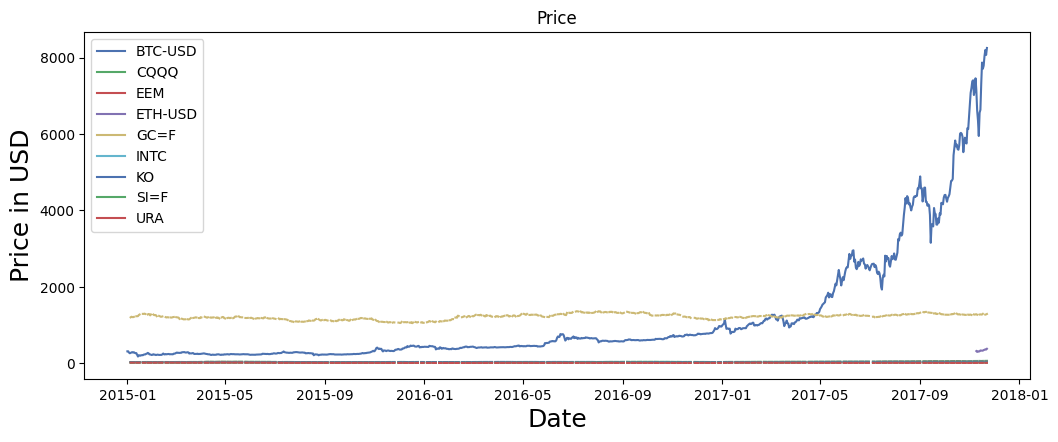

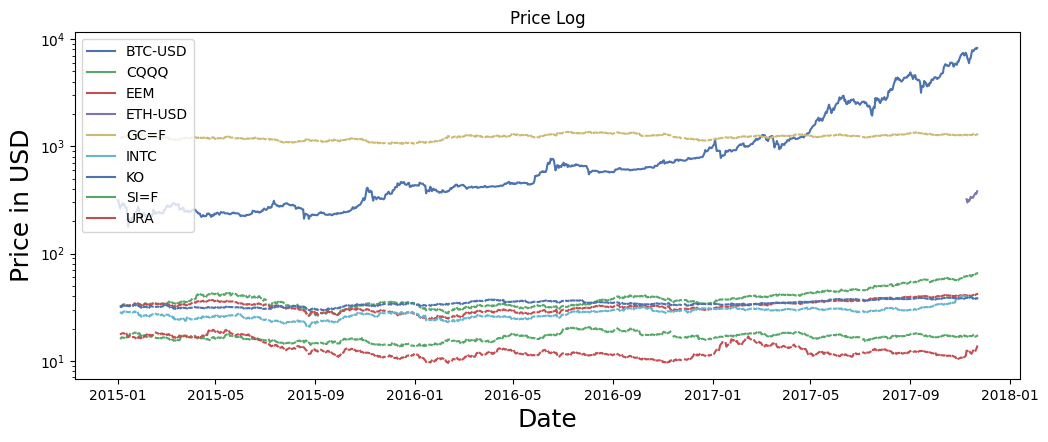

In [236]:
plt.figure(figsize=(12.2,4.5))
for i in df.columns.values:
    plt.plot( df[i],  label=i)
plt.title('Price')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price in USD',fontsize=18)
plt.legend(df.columns.values, loc='upper left')

plt.show()


plt.figure(figsize=(12.2,4.5))
for i in df.columns.values:
    plt.plot( df[i],  label=i)
plt.title('Price Log')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price in USD',fontsize=18)
plt.legend(df.columns.values, loc='upper left')
plt.yscale('log')

plt.show()




In [237]:
#Checking if any NaN values in the data
nullin_df = pd.DataFrame(df)
print(nullin_df.isnull().sum())


BTC-USD       0
CQQQ        327
EEM         327
ETH-USD    1043
GC=F        329
INTC        327
KO          327
SI=F        329
URA         327
dtype: int64


In [238]:
#Annluaized Return
mu = expected_returns.mean_historical_return(df)

#Sample Variance of Portfolio
Sigma = risk_models.sample_cov(df)
print ("Annluaized Return %:")
print (mu)

Annluaized Return %:
BTC-USD     1.181286
CQQQ        0.181714
EEM         0.063129
ETH-USD    26.412706
GC=F        0.020583
INTC        0.073109
KO          0.042383
SI=F        0.020100
URA        -0.069664
dtype: float64


In [239]:
#Max Sharpe Ratio - Tangent to the EF
ef = EfficientFrontier(mu, Sigma, weight_bounds=(0,1)) #weight bounds in negative allows shorting of stocks
sharpe_pfolio=ef.max_sharpe() #May use add objective to ensure minimum zero weighting to individual stocks
sharpe_pwt=ef.clean_weights()
print(sharpe_pwt)

OrderedDict([('BTC-USD', 0.0), ('CQQQ', 0.28251), ('EEM', 0.01411), ('ETH-USD', 0.64544), ('GC=F', 0.0), ('INTC', 0.0), ('KO', 0.0), ('SI=F', 0.0), ('URA', 0.05794)])


In [241]:
ef.portfolio_performance(verbose=True, risk_free_rate = 0.27)
# 2year risk free rate - Treasury Yield

Expected annual return: 1709.6%
Annual volatility: 38.9%
Sharpe Ratio: 43.94


(17.096085640443125, 0.3885823246617223, 43.94457636566098)

In [242]:
#Min Volatility Portfolio
ef1 = EfficientFrontier(mu, Sigma, weight_bounds=(0,1)) #weight bounds in negative allows shorting of stocks
minvol=ef1.min_volatility()
minvol_pwt=ef1.clean_weights()
print(minvol_pwt)

OrderedDict([('BTC-USD', 0.01172), ('CQQQ', 0.06272), ('EEM', 0.0), ('ETH-USD', 0.0), ('GC=F', 0.42856), ('INTC', 0.09073), ('KO', 0.39961), ('SI=F', 0.0), ('URA', 0.00666)])


In [243]:
ef1.portfolio_performance(verbose=True, risk_free_rate = 0.27)

Expected annual return: 5.7%
Annual volatility: 7.6%
Sharpe Ratio: -2.82


(0.057169601111499525, 0.07553593125879403, -2.8176047523571426)

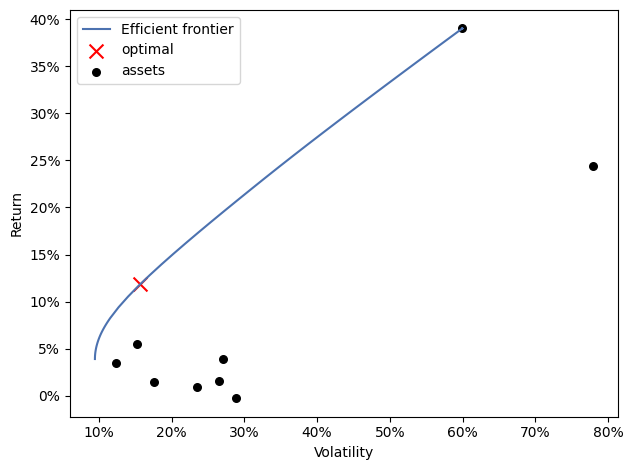

In [227]:
cl_obj = CLA(mu, Sigma)
ax = pplt.plot_efficient_frontier(cl_obj, showfig = False)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))